<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 03: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [3]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
#import pandas_profiling

In [40]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 1000)

In [3]:
nyc_df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory=False, index_col=0)

In [8]:
nyc_df.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [9]:
nyc_df.tail()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,85 ROAD,FOREST PARKWAY,85 STREET,NaN,NaN,ADDRESS,WOODHAVEN,NaN,Precinct,Closed,01/01/2015 08:04:44 AM,The Police Department responded to the complai...,01/01/2015 10:22:31 AM,09 QUEENS,QUEENS,1022809.0,192567.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,SEDGWICK AVENUE,BAILEY AVENUE,BEND,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2015 08:04:28 AM,The Police Department responded to the complai...,01/01/2015 02:25:02 AM,07 BRONX,BRONX,1009923.0,255465.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,WEST 139 STREET,AMSTERDAM AVENUE,HAMILTON PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2015 08:01:30 AM,The Police Department responded to the complai...,01/01/2015 12:20:33 AM,09 MANHATTAN,MANHATTAN,997847.0,238629.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,EAST 226 STREET,BRONXWOOD AVENUE,PAULDING AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2015 08:01:29 AM,The Police Department responded and upon arriv...,01/01/2015 02:42:22 AM,12 BRONX,BRONX,1024816.0,262237.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"
29611816,01/01/2015 12:00:50 AM,01/01/2015 02:47:50 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,123-19 135 STREET,135 STREET,ROCKAWAY BOULEVARD,SUTTER AVENUE,NaN,NaN,ADDRESS,SOUTH OZONE PARK,NaN,Precinct,Closed,01/01/2015 08:00:50 AM,The Police Department responded to the complai...,01/01/2015 02:47:50 AM,10 QUEENS,QUEENS,1038733.0,184971.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674212,-73.803585,"(40.674211762243935, -73.80358548685278)"


In [10]:
nyc_df.describe()

,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [11]:
#pandas_profiling.ProfileReport(nyc_df)

In [12]:
nrows, ncols = nyc_df.shape
print(f'No. of Tickets: {nrows},\nNo. of columns: {ncols}')

No. of Tickets: 364558,
No. of columns: 52


In [13]:
(nyc_df.isna().sum()/nrows)*100

Created Date                        0.000000
Closed Date                         0.653120
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.783255
Location Type                       0.036483
Incident Zip                        0.822366
Incident Address                   14.181283
Street Name                        14.181283
Cross Street 1                     15.686941
Cross Street 2                     15.856187
Intersection Street 1              85.977540
Intersection Street 2              86.144317
Address Type                        0.892039
City                                0.822091
Landmark                           99.897136
Facility Type                       0.655314
Status                              0.000000
Due Date                            0.000823
Resolution Description              0.000000
Resolution Action Updated Date      0.658880
Community 

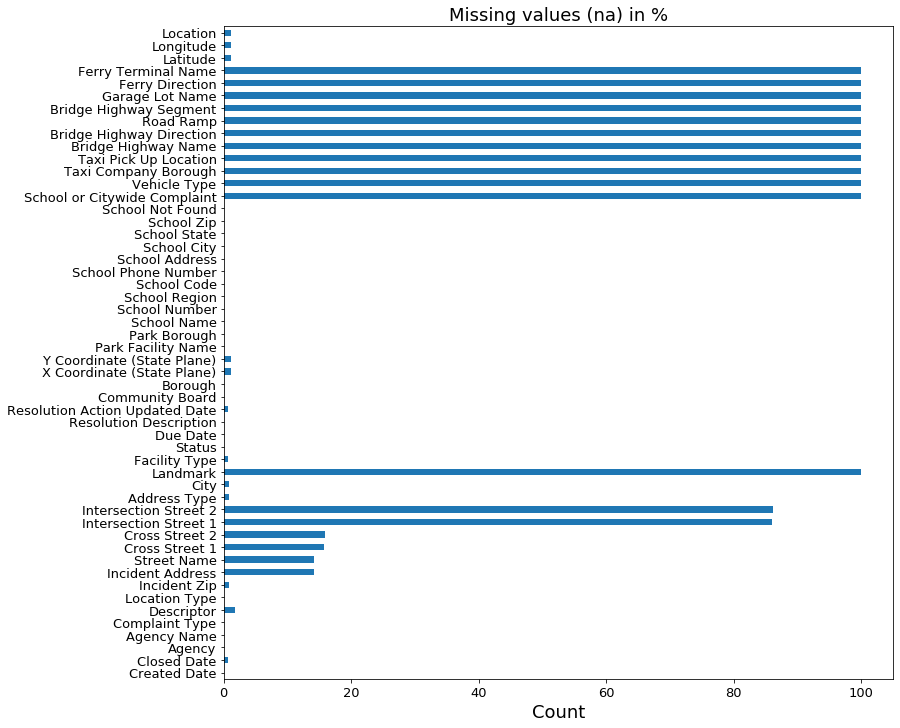

In [14]:
percent_missing = (nyc_df.isna().sum()/nrows)*100
#percent_missing.sort_values()
ax = percent_missing.plot(kind='barh', alpha=1, figsize=(12, 12), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Missing values (na) in %", fontsize=18)
ax.set_xlabel("Count", fontsize=18);


In [15]:
# Removing columns which has more than 80% missing value
nyc_df = nyc_df.loc[:, nyc_df.isnull().sum() < 0.8*nrows]

In [16]:
nyc_df.shape

(364558, 38)

In [17]:
nrows, ncols = nyc_df.shape
print(f'No. of Tickets: {nrows},\nNo. of columns: {ncols}')

No. of Tickets: 364558,
No. of columns: 38


In [18]:
# Unique values per columns
nyc_df.nunique()

Created Date                      362018
Closed Date                       339837
Agency                                 1
Agency Name                            3
Complaint Type                        24
Descriptor                            45
Location Type                         18
Incident Zip                         201
Incident Address                  126372
Street Name                         7693
Cross Street 1                      6234
Cross Street 2                      6064
Address Type                           5
City                                  53
Facility Type                          1
Status                                 4
Due Date                          362015
Resolution Description                18
Resolution Action Updated Date    340833
Community Board                       75
Borough                                6
X Coordinate (State Plane)         68410
Y Coordinate (State Plane)         79924
Park Facility Name                     2
Park Borough    

In [19]:
# Analyzing low variance data

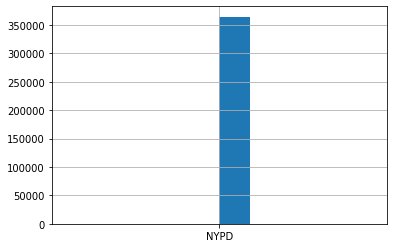

In [20]:
nyc_df['Agency'].hist();

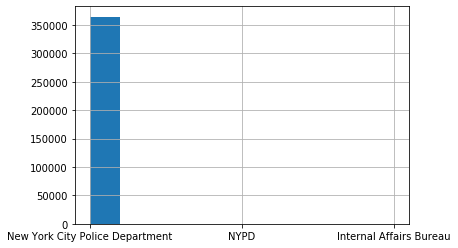

In [21]:
nyc_df['Agency Name'].hist()

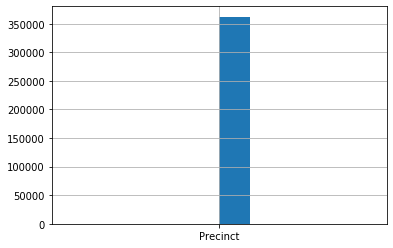

In [22]:
nyc_df['Facility Type'].hist()

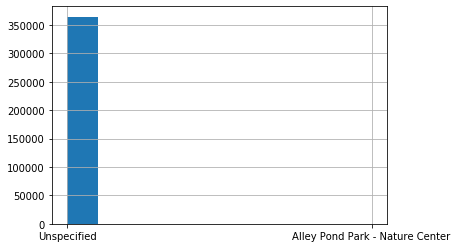

In [23]:
nyc_df['Park Facility Name'].hist()

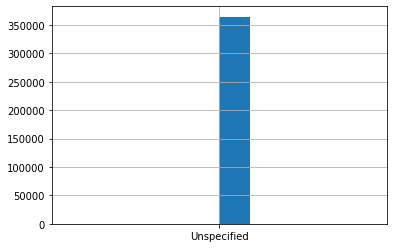

In [24]:
nyc_df['School Region'].hist()

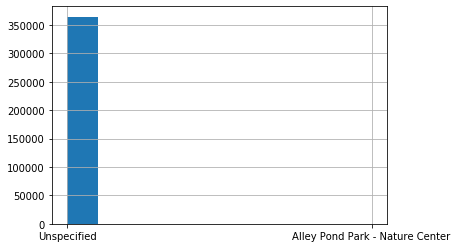

In [25]:
nyc_df['Park Facility Name'].hist();

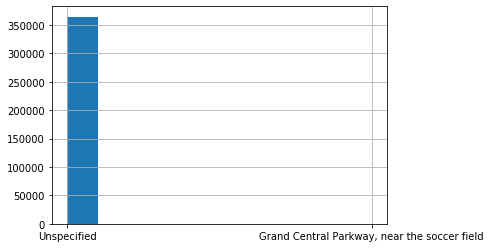

In [26]:
nyc_df['School Address'].hist();

In [27]:
# Removing 0 variance data i.e. single value columns
nyc_df = nyc_df.loc[:, nyc_df.nunique() > 3]

In [28]:
nrows, ncols = nyc_df.shape
print(f'No. of Tickets: {nrows},\nNo. of columns: {ncols}')

No. of Tickets: 364558,
No. of columns: 24


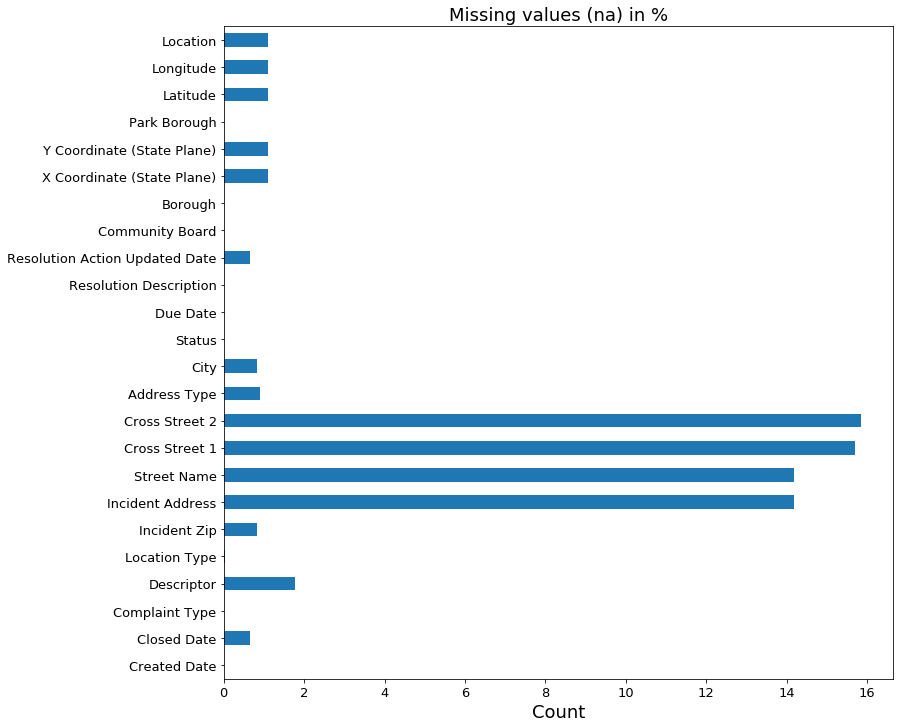

In [29]:
percent_missing = (nyc_df.isna().sum()/nrows)*100
#percent_missing.sort_values()
ax = percent_missing.plot(kind='barh', alpha=1, figsize=(12, 12), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Missing values (na) in %", fontsize=18)
ax.set_xlabel("Count", fontsize=18);


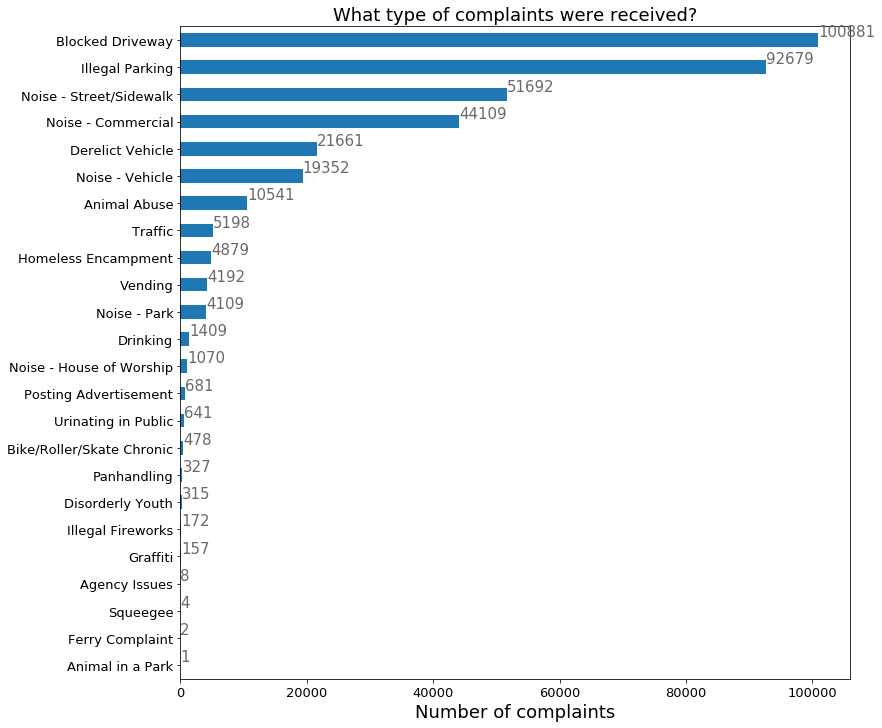

In [30]:
# Types of complaints (count)

complain_types = nyc_df['Complaint Type'].value_counts(ascending=True)
ax = complain_types.plot(kind='barh', alpha=1, figsize=(12, 12), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("What type of complaints were received?", fontsize=18)
ax.set_xlabel("Number of complaints", fontsize=18);
#ax.set_xticks([0, 5, 10, 15, 20])
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
totals.reverse()
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            i.get_width(), fontsize=15,
color='dimgrey')

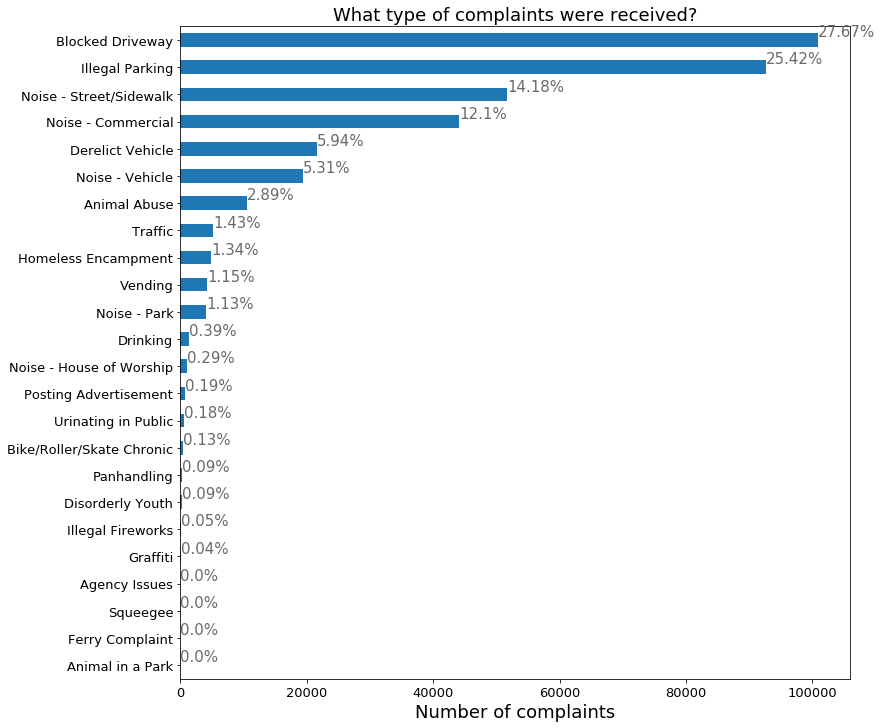

In [31]:
# Types of complaints in percentage

complain_types = nyc_df['Complaint Type'].value_counts(ascending=True)
ax = complain_types.plot(kind='barh', alpha=1, figsize=(12, 12), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("What type of complaints were received?", fontsize=18)
ax.set_xlabel("Number of complaints", fontsize=18);
#ax.set_xticks([0, 5, 10, 15, 20])
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
totals.reverse()
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

In [32]:
# Types of complaints

top_10_complain_types = nyc_df['Complaint Type'].value_counts(ascending=False).head(10)
top_10_complain_types

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

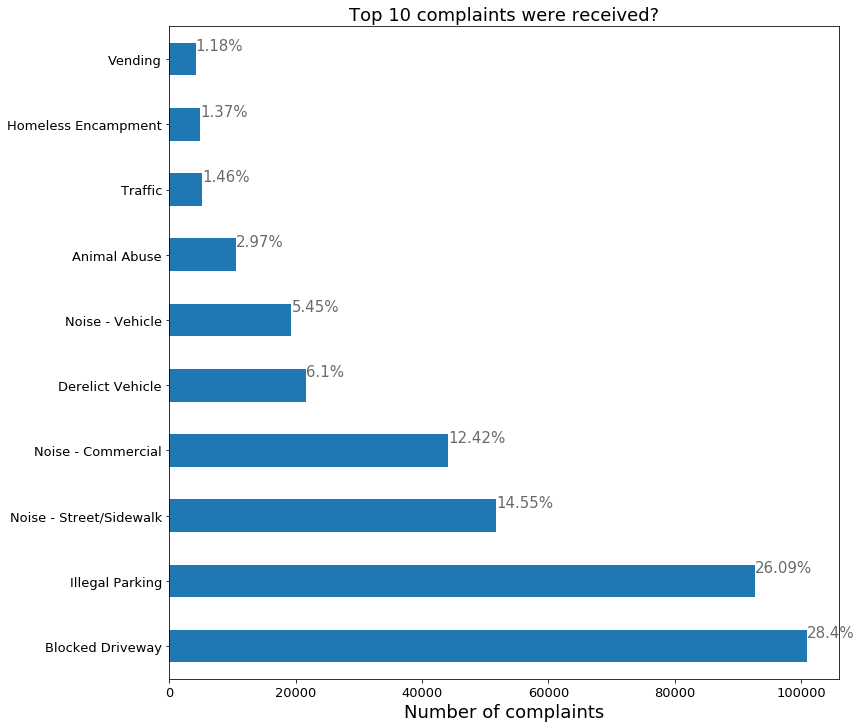

In [33]:
# Plotting top 10 complaints
ax = top_10_complain_types.plot(kind='barh', alpha=1, figsize=(12, 12), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Top 10 complaints were received?", fontsize=18)
ax.set_xlabel("Number of complaints", fontsize=18);

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# totals.reverse()
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

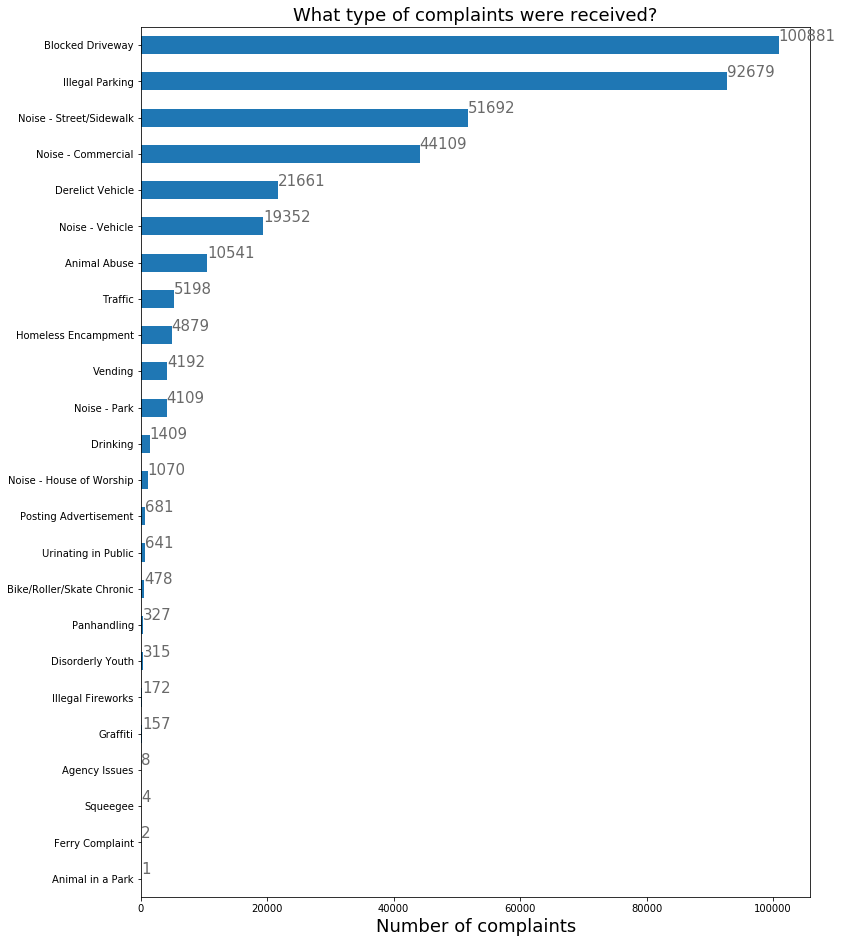

In [34]:
# complaints by city (count)

complain_by_city = nyc_df['City'].value_counts(ascending=True)
ax = complain_types.plot(kind='barh', alpha=1, figsize=(12, 16), fontsize=10)
ax.set_alpha(0.8)
ax.set_title("What type of complaints were received?", fontsize=18)
ax.set_xlabel("Number of complaints", fontsize=18);
#ax.set_xticks([0, 5, 10, 15, 20])
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
totals.reverse()
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            i.get_width(), fontsize=15,
color='dimgrey')

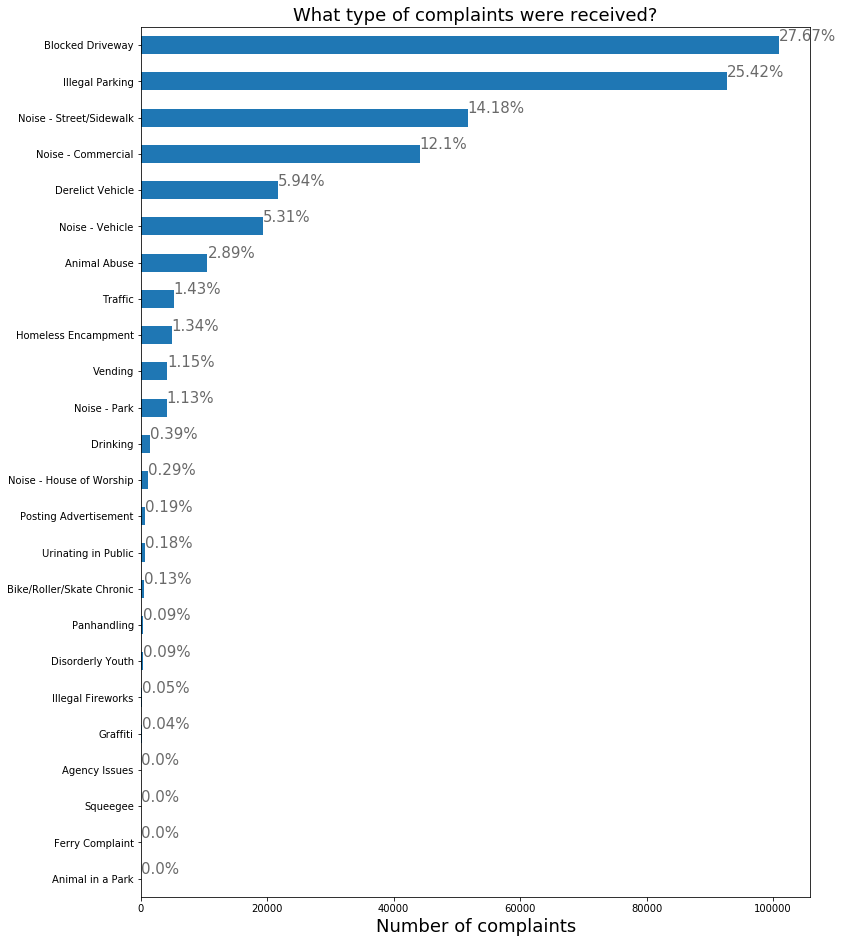

In [35]:
# complaints by city in percentages

complain_by_city = nyc_df['City'].value_counts(ascending=True)
ax = complain_types.plot(kind='barh', alpha=1, figsize=(12, 16), fontsize=10)
ax.set_alpha(0.8)
ax.set_title("What type of complaints were received?", fontsize=18)
ax.set_xlabel("Number of complaints", fontsize=18);
#ax.set_xticks([0, 5, 10, 15, 20])
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
totals.reverse()
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

In [6]:
# Displaying the complaint type and city together
nyc_df[['Complaint Type','City']]

,Complaint Type,City
Unique Key,,
32310363,Noise - Street/Sidewalk,NEW YORK
32309934,Blocked Driveway,ASTORIA
32309159,Blocked Driveway,BRONX
32305098,Illegal Parking,BRONX
32306529,Illegal Parking,ELMHURST
...,...,...
29609918,Illegal Parking,WOODHAVEN
29608392,Noise - Vehicle,BRONX
29607589,Noise - Street/Sidewalk,NEW YORK


In [36]:
# Displaying the complaint type and city together
pd.crosstab(nyc_df['Complaint Type'], nyc_df['City'], margins=True, margins_name="Total")

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,COLLEGE POINT,CORONA,EAST ELMHURST,ELMHURST,East Elmhurst,FAR ROCKAWAY,FLORAL PARK,FLUSHING,FOREST HILLS,FRESH MEADOWS,GLEN OAKS,HOLLIS,HOWARD BEACH,Howard Beach,JACKSON HEIGHTS,JAMAICA,KEW GARDENS,LITTLE NECK,LONG ISLAND CITY,Long Island City,MASPETH,MIDDLE VILLAGE,NEW HYDE PARK,NEW YORK,OAKLAND GARDENS,OZONE PARK,QUEENS,QUEENS VILLAGE,REGO PARK,RICHMOND HILL,RIDGEWOOD,ROCKAWAY PARK,ROSEDALE,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside,Total
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,46,170,0,53,15,2,1971,3191,15,0,35,104,85,59,0,111,7,191,78,66,5,39,51,0,50,317,26,21,40,0,56,36,1,1941,29,72,1,90,33,55,154,33,44,43,74,40,42,786,40,43,57,111,0,10529
Animal in a Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Bike/Roller/Skate Chronic,0,16,0,0,1,0,22,124,0,0,0,0,1,2,0,0,0,3,6,0,0,0,1,0,2,3,0,0,3,0,1,1,0,254,2,1,0,0,0,0,3,0,2,0,1,1,0,10,2,4,2,5,0,473
Blocked Driveway,50,3436,159,514,138,3,17063,36447,177,0,597,3597,1925,1992,0,383,33,3641,873,682,48,442,215,1,703,3621,429,174,1052,55,1000,663,76,2707,177,1681,3,772,780,1100,2162,80,270,318,1202,1946,330,2845,278,279,1364,2038,27,100548
Derelict Vehicle,32,426,14,231,120,3,2403,6259,148,0,223,72,136,94,2,215,74,532,71,347,57,162,172,0,41,1133,16,73,220,4,510,366,14,695,117,479,2,478,94,201,507,19,247,248,425,356,267,2184,17,279,369,298,8,21460
Disorderly Youth,2,5,0,2,2,0,66,79,0,0,1,6,1,2,0,1,1,2,1,0,0,1,1,0,0,9,0,2,2,0,2,0,0,81,1,4,0,0,0,0,3,4,0,1,2,2,0,25,2,1,0,1,0,315
Drinking,1,43,0,1,1,1,206,291,0,0,1,34,9,13,0,4,1,47,1,2,0,3,4,0,10,40,1,1,8,0,9,2,0,321,2,20,0,5,4,10,10,23,2,3,14,25,6,188,12,3,4,15,0,1401
Graffiti,1,4,0,3,0,0,15,60,0,0,2,4,3,1,0,0,0,6,3,0,0,0,0,0,1,3,0,0,3,0,1,0,0,25,0,0,0,1,1,1,3,0,2,0,2,0,0,6,1,1,0,4,0,157
Homeless Encampment,4,32,0,2,1,0,275,948,6,0,3,26,2,34,0,16,0,26,18,6,0,9,3,0,11,93,5,0,10,0,11,5,0,3060,1,8,2,19,6,30,26,4,4,11,5,12,7,77,12,0,10,38,0,4878


In [37]:
complainsts_types_by_city = pd.crosstab(nyc_df['Complaint Type'], nyc_df['City'])

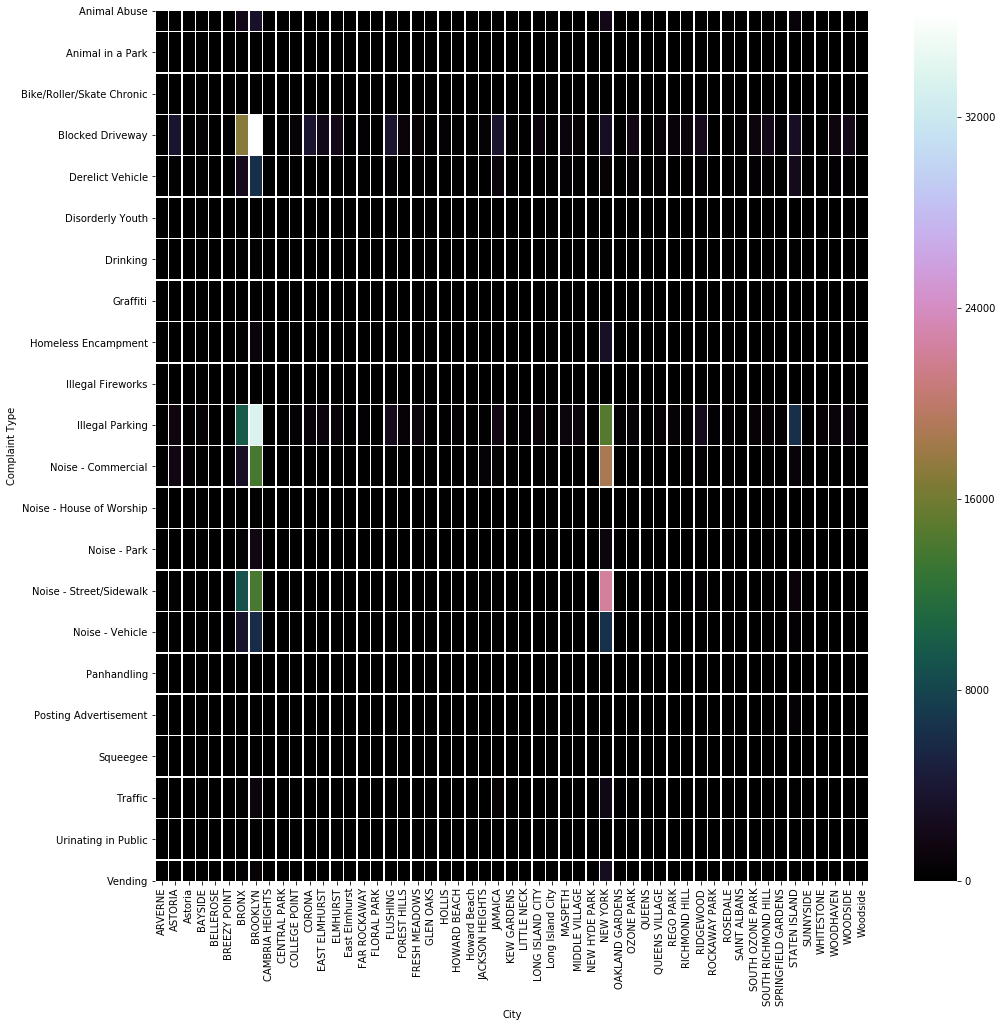

In [38]:
plt.figure(figsize=(16, 16))
ax = sns.heatmap(complainsts_types_by_city, cmap="cubehelix", linewidths=.5)

In [42]:
# Digging deeper into compaints
nyc_df.columns.to_list()

['Created Date',
 'Closed Date',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Address Type',
 'City',
 'Status',
 'Due Date',
 'Resolution Description',
 'Resolution Action Updated Date',
 'Community Board',
 'Borough',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Park Borough',
 'Latitude',
 'Longitude',
 'Location']

In [45]:
nyc_df['Closed Date'] = pd.to_datetime(nyc_df['Closed Date'])
nyc_df['Created Date'] = pd.to_datetime(nyc_df['Created Date'])

In [86]:
nyc_df['Resolution_Time'] = nyc_df['Closed Date'] - nyc_df['Created Date']

In [87]:
nyc_df['Resolution_Time'] = nyc_df['Resolution_Time']/np.timedelta64(1,'h')

In [88]:
nyc_df[['Complaint Type', 'City', 'Resolution_Time']].groupby(['Complaint Type', 'City']).mean()

Resolution_Time
Complaint Type City                          
Animal Abuse   ARVERNE               2.333110
               ASTORIA               4.779690
               BAYSIDE               3.112096
               BELLEROSE             8.880333
               BREEZY POINT          2.613472
...                                       ...
Vending        STATEN ISLAND         4.271911
               SUNNYSIDE             9.723704
               WHITESTONE            2.332222
               WOODHAVEN             2.840000
               WOODSIDE              7.300130

[777 rows x 1 columns]

In [90]:
#nyc_df[['Complaint Type', 'City', 'Resolution_Time']].cross

In [92]:
pd.pivot_table(nyc_df[['Complaint Type', 'City', 'Resolution_Time']], index='Complaint Type', columns=['City'], aggfunc='mean')

Resolution_Time                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
City                              ARVERNE    ASTORIA   Astoria   BAYSIDE  BELLEROSE BREEZY POINT      BRONX  BROOKLYN CAMBRIA HEIGHTS CENTRAL PARK COLLEGE POINT    CORONA EAST ELMHURST  ELMHURST East Elmhurst FAR ROCKAWAY FLORAL PARK  FLUSHING FOREST HILLS FRESH MEADOWS  GLEN OAKS     HOLLIS HOWARD BEACH Howard Beach JACKSON HEIGHTS   JAMAICA KEW GARDENS LITTLE NECK LONG ISLAND CITY Long Island City    MASPETH MIDDLE VILLAGE NEW HYDE PARK  NEW YORK OAKLAND GARDENS OZONE PARK      QUEENS QUEENS VILLAGE REGO PARK RICHMOND HILL RIDGEWOOD ROCKAWAY PARK   ROSEDALE SAINT ALBANS SOUTH OZONE PARK SOUTH RICHMOND HILL SPRINGFIELD GARDENS STATEN ISLAND  SUNNYSIDE WHITESTONE WOODHAVEN   WOODSIDE  Woodside
Complaint Type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
Animal Abuse                     2.333110   4.779690       NaN  3.112096   8.880333     2.613472   7.008490  4.638388        9.734167          NaN      4.359984  3.342642      3.791333  3.481106           NaN     2.553488   11.300595  3.219258     3.036346      3.364074  12.991278   4.591460     4.307337          NaN        4.019756  4.864902    4.126955    2.712500         5.740792              NaN   6.532599       8.764414      1.923889  3.543376        2.621370   5.059799    2.374444      11.179960  4.010337      5.124429  6.596703      2.376852  12.793535     6.906738         3.829985            4.183007           12.497130      4.689767  11.432632   2.783043  5.248796   6.996429       NaN
Animal in a Park                      NaN        NaN       NaN       NaN        NaN          NaN        NaN       NaN             NaN          NaN           NaN       NaN           NaN       NaN           NaN          NaN         NaN       NaN          NaN           NaN        NaN        NaN          NaN          NaN             NaN       NaN         NaN         NaN              NaN              NaN        NaN            NaN           NaN       NaN             NaN        NaN  336.842778            NaN       NaN           NaN       NaN           NaN        NaN          NaN              NaN                 NaN                 NaN           NaN        NaN        NaN       NaN        NaN       NaN
Bike/Roller/Skate Chronic             NaN   1.866319       NaN       NaN   4.893333          NaN   3.771288  4.699666             NaN          NaN           NaN       NaN      0.252222  4.622778           NaN          NaN         NaN  5.733056     4.157870           NaN        NaN        NaN     2.630000          NaN        4.115694  2.501204         NaN         NaN         6.760000              NaN   8.835278      15.682222           NaN  2.823107        1.120972   7.187500         NaN            NaN     